In [1]:
from PIL import Image
from pprint import pprint
import os
import pandas as pd

from model.cnn import SSD
from utils.dataloader import gen_bccd_dataloader
from utils.manager import Manager

In [2]:
model = SSD()
object_detector = Manager(model=model)
dataloader = gen_bccd_dataloader()

In [3]:
train_log = object_detector.train(
    num_epochs=30, 
    dataloader=dataloader,
    print_iter=True)

Epoch 1/30 ----------------
    iteration 10 | Loss_c: 47.8422 | Loss_l: 8.0089
    iteration 20 | Loss_c: 7.7159 | Loss_l: 3.2389
    iteration 30 | Loss_c: 4.2226 | Loss_l: 3.4229
    iteration 40 | Loss_c: 5.9585 | Loss_l: 2.5210
    iteration 50 | Loss_c: 4.3915 | Loss_l: 2.3522
    iteration 60 | Loss_c: 3.3257 | Loss_l: 2.1067
    iteration 70 | Loss_c: 2.7068 | Loss_l: 1.7389
    TRAIN | epoch_loss_l: 477.0766, epoch_loss_c: 1787.2908
    batch elasped time:  89.8431 sec.
Epoch 2/30 ----------------
    iteration 80 | Loss_c: 2.8288 | Loss_l: 2.0524
    iteration 90 | Loss_c: 4.2548 | Loss_l: 1.3734
    iteration 100 | Loss_c: 3.8599 | Loss_l: 1.7847
    iteration 110 | Loss_c: 2.9443 | Loss_l: 2.0830
    iteration 120 | Loss_c: 3.3963 | Loss_l: 1.7209
    iteration 130 | Loss_c: 2.4284 | Loss_l: 1.4271
    iteration 140 | Loss_c: 3.4101 | Loss_l: 2.0877
    TRAIN | epoch_loss_l: 127.6266, epoch_loss_c: 205.9933
    batch elasped time:  90.9368 sec.
Epoch 3/30 ----------------
 

In [4]:
df_log = pd.DataFrame(train_log)
df_log

,epoch,train_loss_c,train_loss_l,val_loss_c,val_loss_l
0,1,1787.290831,477.076561,NaN,NaN
1,2,205.993291,127.626649,NaN,NaN
2,3,172.173890,109.390617,NaN,NaN
3,4,141.394314,88.585113,NaN,NaN
4,5,122.914198,74.169889,NaN,NaN
5,6,119.781027,71.372050,NaN,NaN
6,7,104.225117,63.156745,NaN,NaN
7,8,105.190948,61.287553,NaN,NaN
8,9,102.977958,54.910949,NaN,NaN
9,10,99.071089,52.905067,16.098387,16.098387


In [5]:
model.save_weight(fname="pytorch_ssd.pth")

In [6]:
another_model = SSD()
another_model.load_weight(fname="pytorch_ssd.pth")

In [7]:
validation_data_index = 10

dataloader.dataset.set_mode(mode="val")
fpath = dataloader.dataset.img_file_name(index=validation_data_index)
print(fpath)

img_pil = Image.open(fpath)
another_object_detector = Manager(model=another_model)
list_box, list_label, list_conf = another_object_detector.predict(img_pil=img_pil)

df_bbox = pd.DataFrame(
    list(zip(list_label, list_conf, list_box)), 
    columns=['label', 'confidence', 'box_cordinate'])
df_bbox

BCCD_Dataset\BCCD\JPEGImages\BloodImage_00341.jpg


..\torch\csrc\autograd\python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


,label,confidence,box_cordinate
0,WBC,0.994613,"[354, 66, 566, 300]"


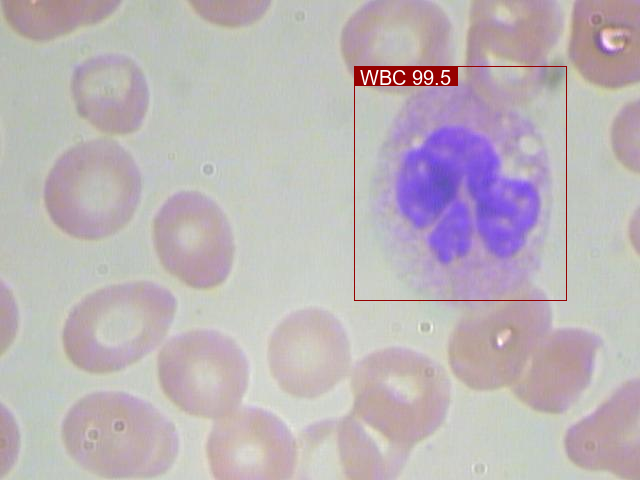

In [8]:
annotated_img = another_object_detector.annotated_img(
    img_pil=img_pil, 
    list_box=list_box, 
    list_label=list_label, 
    list_conf=list_conf)

annotated_img